In [1]:
#import libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#upload dataset, drop rows with missing values, drop columns that would be impossible to determine upon presentation or aggregate features
uploaded = files.upload()
df = pd.read_csv(open("SepsisBiomarkersProcessed.csv", "r"))
df = df.drop(columns=['Unnamed: 0'])
df = df.replace(-1,np.NaN)
df = df.dropna()
df = df.drop(columns = ['28 days survival (yes/no)', 'Positve blood culture (yes/no)', 'Proven bacterial infection (yes/no)', 'Bacterial sepsis using Sepsis-2 criteria (yes/no/cannot be determined)', 'Severe bacterial sepsis/septic shock using Sepsis-2 criteria (yes/no/cannot be determined)', 'Intensive care unit (yes/no)', 'Systemic inflammatory response syndrome (yes/no/cannot be determined)', 'SOFA score ≥2 (yes/no)'])

In [3]:
#simple logistic regression model
def logistic_regression_model(df_arg, train_size):
  X_train, X_test, y_train, y_test = train_test_split(df_arg.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1), 
                                                    df_arg['Bacterial sepsis using Sepsis-3 criteria (yes/no)'], 
                                                    test_size=1-train_size, 
                                                    random_state = 10000)
  model = LogisticRegression(max_iter = 1000)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  print(classification_report(y_test,predictions))

  return model

In [4]:
#train model and assign to variable
logreg_model = logistic_regression_model(df, 0.8)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78       146
         1.0       0.67      0.45      0.54        93

    accuracy                           0.70       239
   macro avg       0.69      0.65      0.66       239
weighted avg       0.69      0.70      0.68       239



In [5]:
#format for predictions
single_prediction = np.array([50.0, 1, 100, 33.0, 93.0, 74.0, 38, 87, 15, 300.0, 0.46, 10.7, 1.86]).reshape(1, -1)
logreg_model.predict(single_prediction)

array([0.])

In [24]:
def NN_function(df_arg, train_size, number_of_layers, number_of_epochs, activation_function):

  dfx = df_arg.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
  dfy = df_arg['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
  X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=1-train_size, random_state = 10000)  

  trainxr = X_train.values.astype('float32')
  testxr = X_test.values.astype('float32')
  trainy = y_train.values.astype('float32')
  testy = y_test.values.astype('float32')

  model = keras.Sequential()

  n_layer = keras.layers.experimental.preprocessing.Normalization()
  n_layer.adapt(trainxr)
#  n_layer(testxr)

#  model.add(layers.Lambda(lambda x: keras.utils.normalize(x,axis=1)))
  model.add(n_layer)

  if (number_of_layers!=1):
    for i in range(number_of_layers-1):
      model.add(layers.Dense(32, activation=activation_function))
    model.add(layers.Dense(32, activation=activation_function))

  model.add(layers.Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(lr=0.0005)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(trainxr, trainy, epochs=number_of_epochs, batch_size=64, validation_data=(testxr, testy), verbose=2, shuffle=True)

  #plot the loss values 
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Test loss')
  plt.legend()
  plt.show()

  #evaluation
  prediction_vector = model.predict(testxr)
  index = 0
  correct = 0
  for i in np.around(prediction_vector):
    if i == testy[index]:
      correct+=1
    index+=1
  print("Accuracy:", correct/(index+1))

  print(model.summary())

  return model

Epoch 1/150
14/14 - 1s - loss: 0.6532 - accuracy: 0.6480 - val_loss: 0.6685 - val_accuracy: 0.5987
Epoch 2/150
14/14 - 0s - loss: 0.6436 - accuracy: 0.6492 - val_loss: 0.6725 - val_accuracy: 0.5987
Epoch 3/150
14/14 - 0s - loss: 0.6388 - accuracy: 0.6492 - val_loss: 0.6705 - val_accuracy: 0.5987
Epoch 4/150
14/14 - 0s - loss: 0.6364 - accuracy: 0.6492 - val_loss: 0.6665 - val_accuracy: 0.5987
Epoch 5/150
14/14 - 0s - loss: 0.6337 - accuracy: 0.6492 - val_loss: 0.6629 - val_accuracy: 0.5987
Epoch 6/150
14/14 - 0s - loss: 0.6310 - accuracy: 0.6492 - val_loss: 0.6611 - val_accuracy: 0.5987
Epoch 7/150
14/14 - 0s - loss: 0.6282 - accuracy: 0.6492 - val_loss: 0.6577 - val_accuracy: 0.5987
Epoch 8/150
14/14 - 0s - loss: 0.6252 - accuracy: 0.6492 - val_loss: 0.6525 - val_accuracy: 0.5987
Epoch 9/150
14/14 - 0s - loss: 0.6222 - accuracy: 0.6492 - val_loss: 0.6489 - val_accuracy: 0.5987
Epoch 10/150
14/14 - 0s - loss: 0.6188 - accuracy: 0.6514 - val_loss: 0.6451 - val_accuracy: 0.5987
Epoch 11/

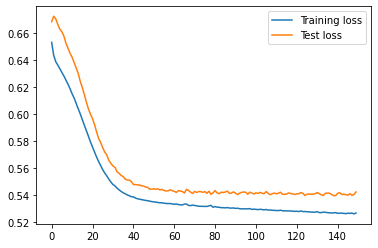

Accuracy: 0.7266666666666667
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_21 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,564
Trainable params: 1,537
Non-trainable params: 27
_________________________________________________________________
None


In [26]:
nn_model = NN_function(df, 0.75, 2, 150, 'sigmoid')

In [15]:
#leftover code on how to make a set of predictions, the function returns a probability as to how likely it believes the person is septic
#uncomment the string literal to make this work
'''
dfnv_x = df.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
dfnv_y = df['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
X_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=0.25, random_state = 10000)  
trainxr = X_train.values.astype('float32')
testxr = X_test.values.astype('float32')
trainy = y_train.values.astype('float32')
testy = y_test.values.astype('float32')

prediction_vector = np.around(nn_model.predict(testxr))
prediction_vector
'''

"\ndfnv_x = df.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)\ndfnv_y = df['Bacterial sepsis using Sepsis-3 criteria (yes/no)']\nX_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=0.25, random_state = 10000)  \ntrainxr = X_train.values.astype('float32')\ntestxr = X_test.values.astype('float32')\ntrainy = y_train.values.astype('float32')\ntesty = y_test.values.astype('float32')\n\nprediction_vector = np.around(nn_model.predict(testxr))\nprediction_vector\n"